# Creating training set

This notebooks generates series of 32x32x32 volumes of both image and mask data of vesicles to create a training set for machine learning. 

In [3]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage.io as io

from skimage.morphology import label as label
from skimage.measure import regionprops as regprop
from skimage.morphology import disk, binary_dilation

import mrcfile

In [24]:
#define location of data
server_path = '/Volumes/synaptosome/pyto/tomo/'
server_path = '/mnt/data/amin/Data/tomo/'
#define location where to save the training data 
folder_to_save = '/Users/gw18g940/Desktop/Test_data/Zuber/multi_set_training/'
folder_to_save = '/mnt/data/amin/Data/train_dataset/'

In [25]:
#find all folders containing data
folders = glob.glob(server_path+'*ctrl*')

In [26]:
folders

['/mnt/data/amin/Data/tomo/spray_ctrl_2',
 '/mnt/data/amin/Data/tomo/spray_ctrl_3',
 '/mnt/data/amin/Data/tomo/spray_ctrl_5',
 '/mnt/data/amin/Data/tomo/spray_ctrl_9',
 '/mnt/data/amin/Data/tomo/spray_ctrl_6',
 '/mnt/data/amin/Data/tomo/spray_ctrl_1',
 '/mnt/data/amin/Data/tomo/spray_ctrl_8',
 '/mnt/data/amin/Data/tomo/spray_ctrl_4',
 '/mnt/data/amin/Data/tomo/spray_ctrl_7']

/mnt/data/amin/Data/tomo/spray_ctrl_2
0


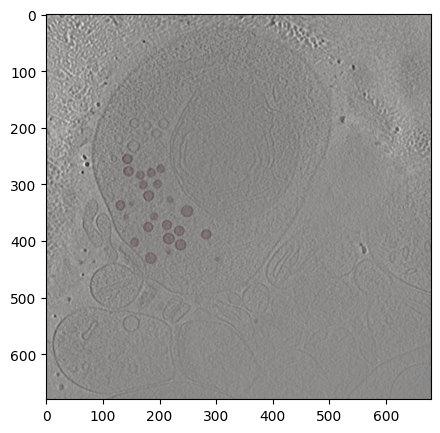

/mnt/data/amin/Data/tomo/spray_ctrl_3
74


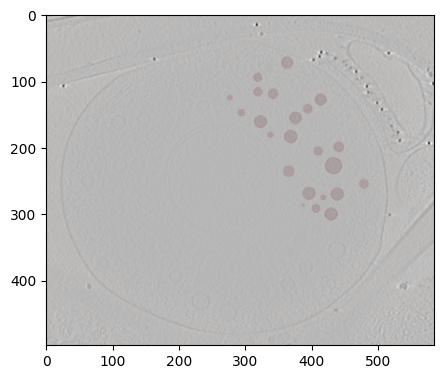

/mnt/data/amin/Data/tomo/spray_ctrl_5
197


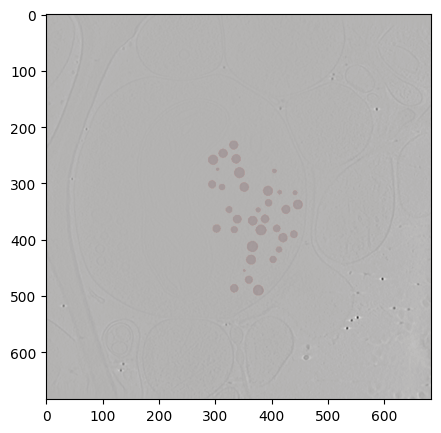

/mnt/data/amin/Data/tomo/spray_ctrl_9
341


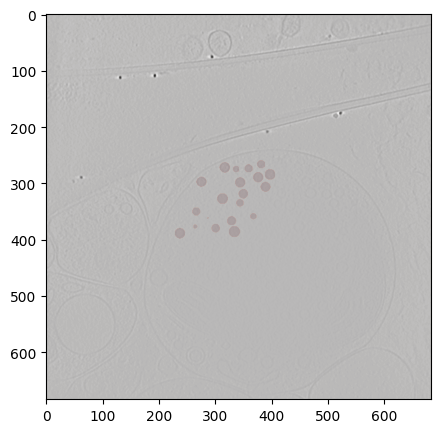

/mnt/data/amin/Data/tomo/spray_ctrl_6
452


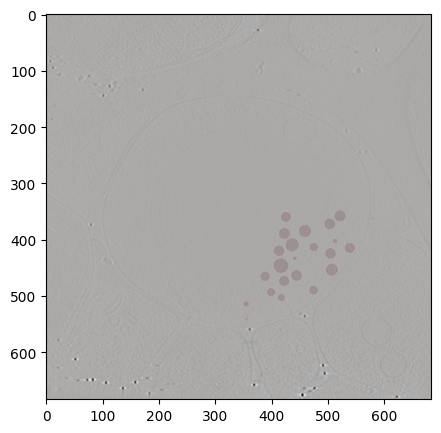

/mnt/data/amin/Data/tomo/spray_ctrl_1
561


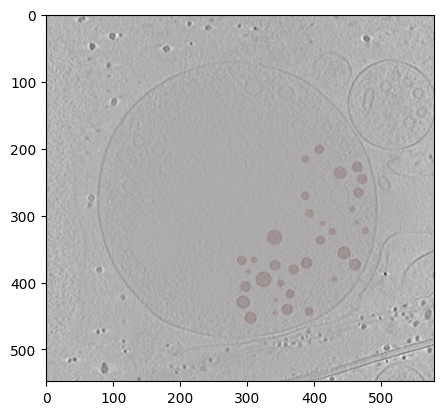

/mnt/data/amin/Data/tomo/spray_ctrl_8
748


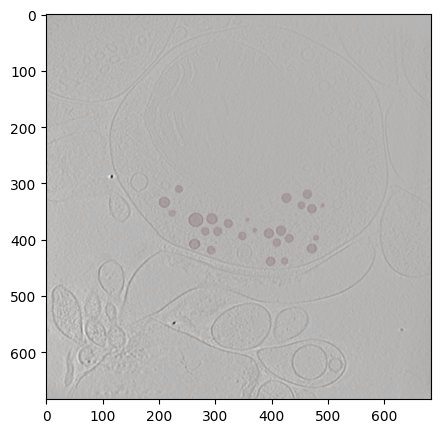

/mnt/data/amin/Data/tomo/spray_ctrl_4
870


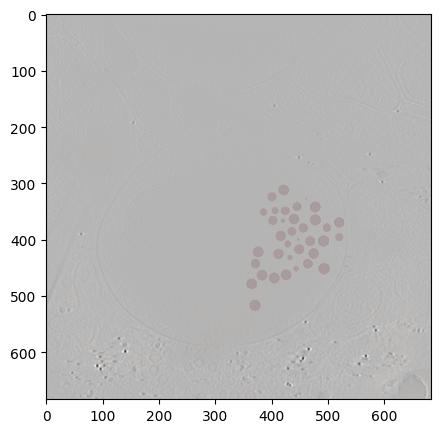

/mnt/data/amin/Data/tomo/spray_ctrl_7
970


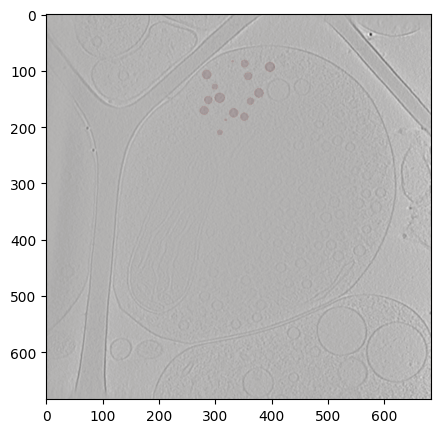

In [27]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
for f in folders:
    
    print(f)
    if os.path.exists(f+'/labels-16bit.mrc'):
        print(ind)
        glob.glob(f+'/*.nad.rec')[0]
        
        imagefile = mrcfile.open(glob.glob(f+'/*.nad.rec')[0])
        maskfile = mrcfile.open(f+'/labels-16bit.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        fig, ax = plt.subplots(figsize=(5,5))
        plt.imshow(image[100,:,:],cmap = 'gray')
        plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        for z in np.arange(0,image.shape[0]-32,32):
            for x in np.arange(0,image.shape[1]-32,32):
                for y in np.arange(0,image.shape[2]-32,32):
                    if np.sum(mask[z:z+32,x:x+32,y:y+32])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+32, x:x+32,y:y+32].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+32, x:x+32,y:y+32].astype(np.float))
                        ind+=1

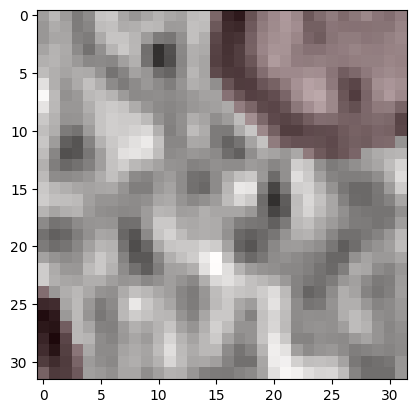

In [31]:
index = 2

image = np.load(folder_to_save+'image_'+str(index)+'.npy')
mask = np.load(folder_to_save+'mask_'+str(index)+'.npy')
plt.imshow(image[25,:,:], cmap = 'gray')
plt.imshow(mask[25,:,:], cmap = 'Reds', alpha = 0.2)
plt.show()


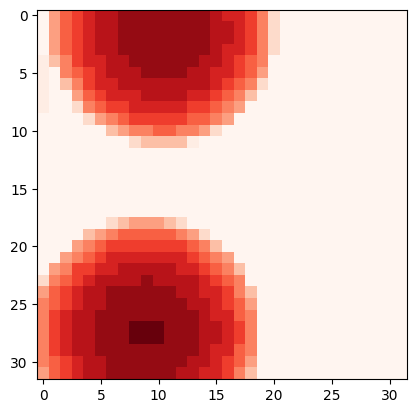

In [29]:
plt.imshow(np.sum(mask[:,:,:],axis = 0), cmap = 'Reds')
plt.show()
